<a href="https://colab.research.google.com/github/Amitkumardas123/Credit-card-Default-Prediction/blob/main/Credit_card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification - Credit card default prediction
##### **Contribution**    - Individual
##### **Name** - Amit Kumar Das

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Amitkumardas123/Credit-card-Default-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# libraries that are used for data read,analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# to set max column display
pd.pandas.set_option('display.max_columns',None)

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
Card_df = pd.read_excel('/content/drive/MyDrive/Full Stack Data Science/Introduction to Machine Learning/Capstone Project - Supervised ML - Classification/default of credit card clients.xls',header = 1)

### Dataset First View

In [5]:
# Dataset First Look
# Viewing the first 5 rows of the datset
Card_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Card_df.shape

(30000, 25)

In [7]:
print(f'number of rows : {Card_df.shape[0]}  \nnumber of columns : {Card_df.shape[1]}')

number of rows : 30000  
number of columns : 25


### Dataset Information

In [8]:
# Dataset Info
Card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup = len(Card_df[Card_df.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Card_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

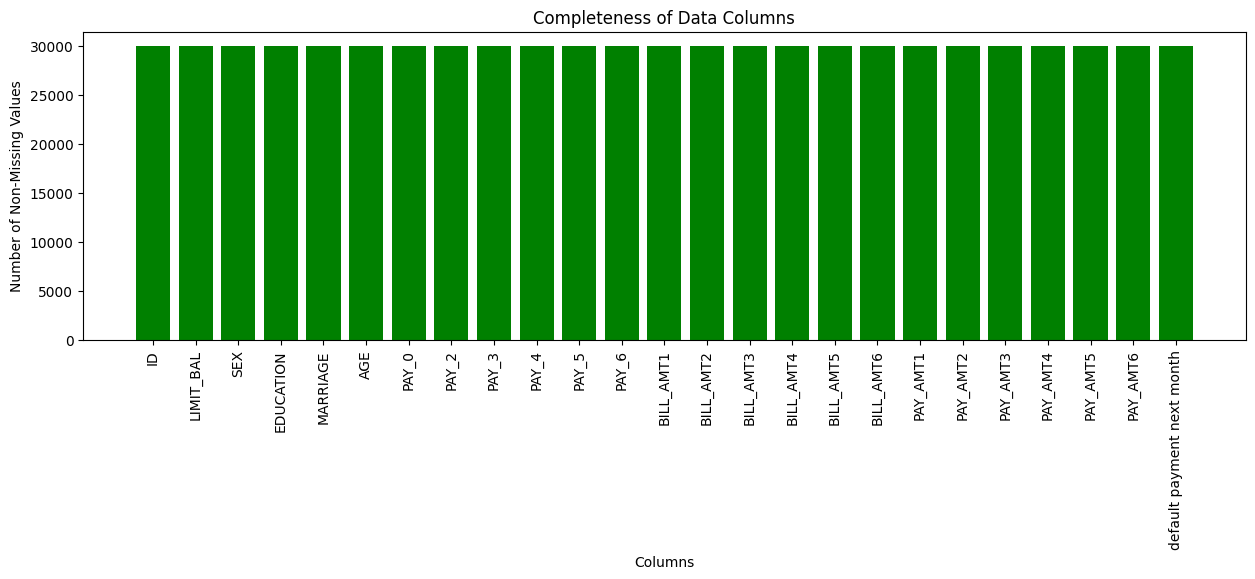

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15, 4))
plt.bar(Card_df.columns, Card_df.notnull().sum(), color='green')
plt.title('Completeness of Data Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Non-Missing Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### What did you know about your dataset?

There are 30000 rows and 25 columns in the dataset. The dataset does not contain any duplicate or missing values.

The given dataset is from the banking industry. Our task is to examine customer credit default and its causes.The proactive identification of customers most likely to default on loan payments is the first step in predicting customer loan default. This is typically done by dynamically analyzing pertinent customer data and actions.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# Dataset Describe
Card_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

### Check Unique Values for each variable.

In [14]:
# Count Unique Values for each variable.
for i in Card_df.columns.tolist():
  print('unique values in ',i, 'are', Card_df[i].nunique())

unique values in  ID are 30000
unique values in  LIMIT_BAL are 81
unique values in  SEX are 2
unique values in  EDUCATION are 7
unique values in  MARRIAGE are 4
unique values in  AGE are 56
unique values in  PAY_0 are 11
unique values in  PAY_2 are 11
unique values in  PAY_3 are 11
unique values in  PAY_4 are 11
unique values in  PAY_5 are 10
unique values in  PAY_6 are 10
unique values in  BILL_AMT1 are 22723
unique values in  BILL_AMT2 are 22346
unique values in  BILL_AMT3 are 22026
unique values in  BILL_AMT4 are 21548
unique values in  BILL_AMT5 are 21010
unique values in  BILL_AMT6 are 20604
unique values in  PAY_AMT1 are 7943
unique values in  PAY_AMT2 are 7899
unique values in  PAY_AMT3 are 7518
unique values in  PAY_AMT4 are 6937
unique values in  PAY_AMT5 are 6897
unique values in  PAY_AMT6 are 6939
unique values in  default payment next month are 2


In [15]:
# Check Unique Values for categorical variable.

categorical_features =['SEX','EDUCATION','MARRIAGE','PAY_0']

for i in categorical_features:
  print('unique values in ',i, 'are', Card_df[i].unique())

unique values in  SEX are [2 1]
unique values in  EDUCATION are [2 1 3 5 4 6 0]
unique values in  MARRIAGE are [1 2 3 0]
unique values in  PAY_0 are [ 2 -1  0 -2  1  3  4  8  7  5  6]


### Variables Description



1.   ID: ID of each client

2.   LIMIT_BAL: Amount of given credit

3.   SEX: Gender (1=male, 2=female)

4.   EDUCATION: Education Qualification(1=graduate school, 2=university, 3=high school, 0, 4, 5, 6=others)

5.   MARRIAGE: Marital status (1=married, 2=single, 3=divorce, 0=others)
6.   AGE: Age in years


    History of Past Payments

7. PAY_0:  Repayment status in September, 2005

 (-2: No consumption ,-1: Paid in full ,0: The use of revolving credit, 1 = payment delay for one month, 2 = payment delay for two months and so on ...,9 = payment delay for nine months and above.)


8. PAY_2: Repayment status in August, 2005 (scale same as above)


9. PAY_3: Repayment status in July, 2005 (scale same as above)


10. PAY_4: Repayment status in June, 2005 (scale same as above)



11. PAY_5: Repayment status in May, 2005 (scale same as above)

12. PAY_6: Repayment status in April, 2005 (scale same as above)


    Amount of bill Statement

13.   BILL_AMT1: Amount of bill statement in September, 2005

14.   BILL_AMT2: Amount of bill statement in August, 2005

15.   BILL_AMT3: Amount of bill statement in July, 2005
16.   BILL_AMT4: Amount of bill statement in June, 2005


17.   BILL_AMT5: Amount of bill statement in May, 2005


18.   BILL_AMT6: Amount of bill statement in April, 2005


    Amount of Previous Payments -Previous amount Paid


19.   PAY_AMT1: Amount of previous payment in September, 2005


20.   PAY_AMT2: Amount of previous payment in August, 2005


21.   PAY_AMT3: Amount of previous payment in July, 2005
22.   PAY_AMT4: Amount of previous payment in June, 2005

23.   PAY_AMT5: Amount of previous payment in May, 2005

24.   PAY_AMT6: Amount of previous payment in April, 2005
25.   default payment next month: Default payment(1=yes, 0=no)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# dont interept my original Dataset thats why i make a copy of my original data
df_copy=Card_df.copy()
df_copy.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [17]:
#rename of columns for better readibility understanding in visualization

df_copy.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df_copy.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_copy.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_copy.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [18]:
# Replace values in SEX, MARRIAGE and EDUCATION variables, refering the dataset description for better visualization and understanding.

df_copy['SEX'] = df_copy['SEX'].replace({1:'Male', 2:'Female'})
df_copy['EDUCATION'] = df_copy['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_copy['MARRIAGE'] = df_copy['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})

In [21]:
df_copy.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEPT  PAY_AUG  \
0   1      20000  Female  University  Married   24         2        2   
1   2     120000  Female  University   Single   26        -1        2   
2   3      90000  Female  University   Single   34         0        0   
3   4      50000  Female  University  Married   37         0        0   
4   5      50000    Male  University  Married   57        -1        0   

   PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  BILL_AMT_SEPT  BILL_AMT_AUG  \
0       -1       -1       -2       -2           3913          3102   
1        0        0        0        2           2682          1725   
2        0        0        0        0          29239         14027   
3        0        0        0        0          46990         48233   
4       -1        0        0        0           8617          5670   

   BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  \
0           689             0             0             0             0   
1          2682          3272          3455          3261             0   
2         13559         14331         14948         15549          1518   
3         49291         28314         28959         29547          2000   
4         35835         20940         19146         19131          2000   

   PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   IsDefaulter  
0            1  
1            1  
2            0  
3            0  
4            0

### What all manipulations have you done and insights you found?

I made a copy for my original dataset and change my column names to the names that are easy to read and I also changed the values of columns sex, marriage and education(all categorical values) to their original form as per the variable description for better understanding in visualization.

Now my dataset is ready for visualization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

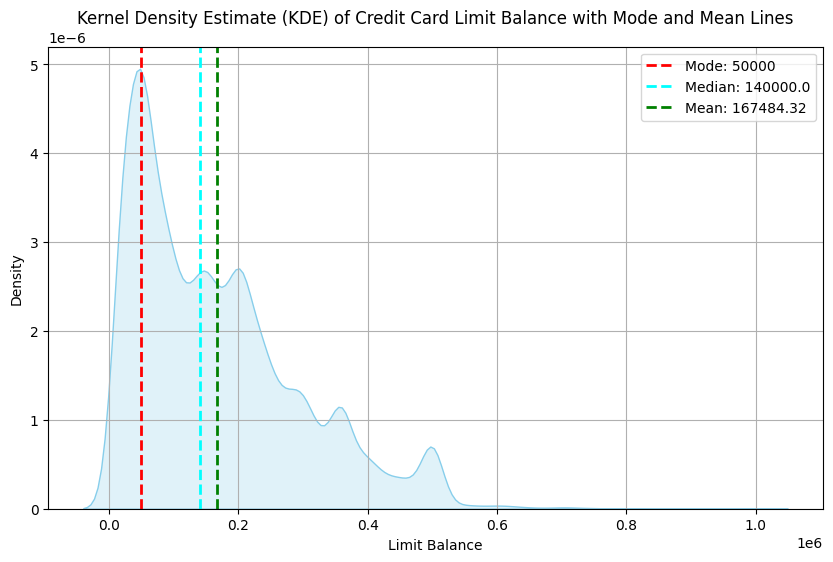

In [43]:
#see distribution of credit card limit balance

# Extracting the relevant column
limit_balance_column = df_copy['LIMIT_BAL']

# Calculate mean credit limit
mean_value = round(limit_balance_column.mean(),2)
mode_value = limit_balance_column.mode().values[0]
median_value = limit_balance_column.median()


# Plotting the kernel density estimate (KDE) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(limit_balance_column, color='skyblue', fill=True)
plt.axvline(mode_value, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')
plt.axvline(median_value, color='cyan', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
plt.title('Kernel Density Estimate (KDE) of Credit Card Limit Balance with Mode and Mean Lines')
plt.xlabel('Limit Balance')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?



*   A density plot can be seen as an extension of the histogram. As opposed to the histogram, the density plot can smooth out the distribution of values and reduce the noise. It visualizes the distribution of data over a given period, and the peaks show where values are concentrated.




##### 2. What is/are the insight(s) found from the chart?



*   Here we will see that most of the customers credit limit is  50k dollar
*    50% of the customer credit limit less than 140k dollar.

*  And the average credit limit is 167.48 dollar

*   There are less number of customer whose credit limit is between (380k - 500k) dollar









#### Chart - 2

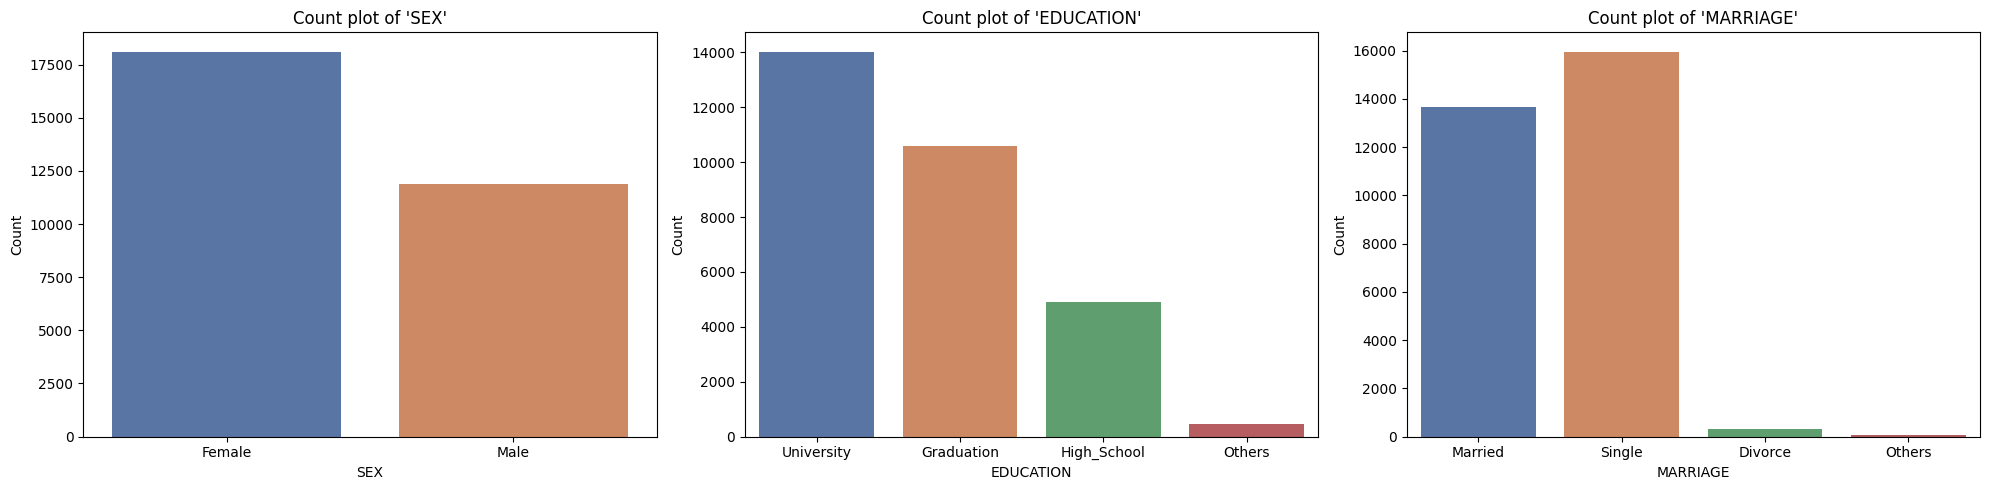

In [53]:
# See demand of credit card for  all categorical features?

# Set a color palette for the count plots
palette = sns.color_palette("deep")

# Create subplots
fig, axs = plt.subplots(1, len(categorical_features)-1, figsize=(20, 5))

# Loop through each categorical variable except Pay_0

for i, cat_var in enumerate(categorical_features[:-1]):
    # Visualization: Count plot of the categorical variable with a different color
    sns.countplot(data=df_copy, x=cat_var, ax=axs[i], palette=palette)

    # Set titles and labels
    axs[i].set_title(f"Count plot of '{cat_var}'")
    axs[i].set_xlabel(cat_var)
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The count plot is suitable for visualizing the distribution of a categorical variable with relatively few unique values, like 'SEX',;EDUCATION' AND 'MARRIAGE' where we want to see the count of each category (male and female) in the SEX, University, graduation, highschool or others in Education and married, single or divorced in marriage.

##### 2. What is/are the insight(s) found from the chart?



*  Females are utilizing credict card facility more than males

*   Education level as university and graduation are more than other types.
*   Divorced people and others are less likely to utilize or using credit cards as compare to single & married




#### Chart - 3

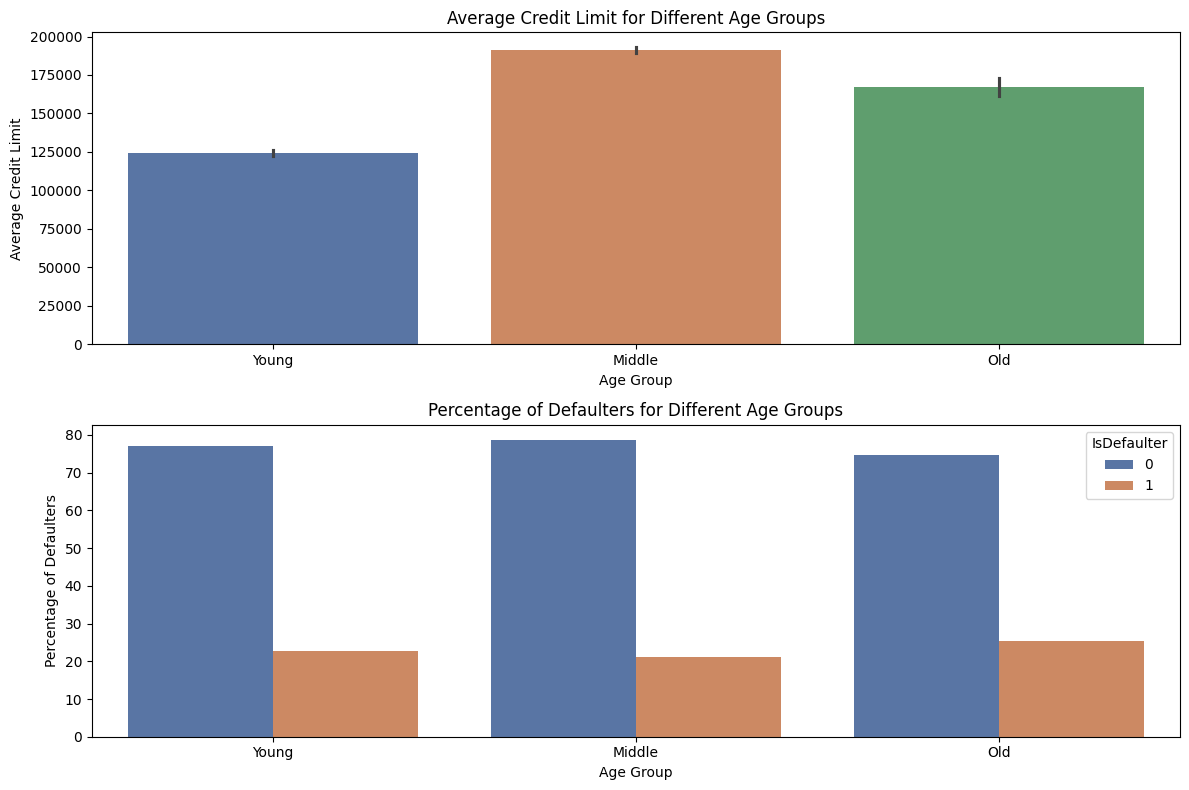

In [58]:
# Find average credit card limit for different different age group and percentage of defaulter

# Create age groups
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle', 'Old']
df_copy['AgeGroup'] = pd.cut(df_copy['AGE'], bins=age_bins, labels=age_labels, right=False)

# Set a deep color palette for the bar plot
palette = sns.color_palette("deep")

# Calculate the percentage of defaulters within each age group
default_percent = df_copy.groupby('AgeGroup')['IsDefaulter'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

# Visualization: Grouped bar plot of average credit limit and percentage of defaulters for age groups
plt.figure(figsize=(12, 8))

# Bar plot for average credit limit
plt.subplot(2, 1, 1)
sns.barplot(data=df_copy, x='AgeGroup', y='LIMIT_BAL', palette=palette, estimator=np.mean)
plt.title('Average Credit Limit for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Limit')

# Bar plot for the percentage of defaulters
plt.subplot(2, 1, 2)
sns.barplot(data=default_percent, x='AgeGroup', y='Percent', hue='IsDefaulter', palette=palette)
plt.title('Percentage of Defaulters for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Defaulters')

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   Avg credit limit for miidle age customer is more than old and young age customer
*   And avg credit limit for young age customer is less than other two group age customer.

*   The chance of defaulter for old,young and middle age group is 24%,22%and 20% respectively







#### Chart - 4

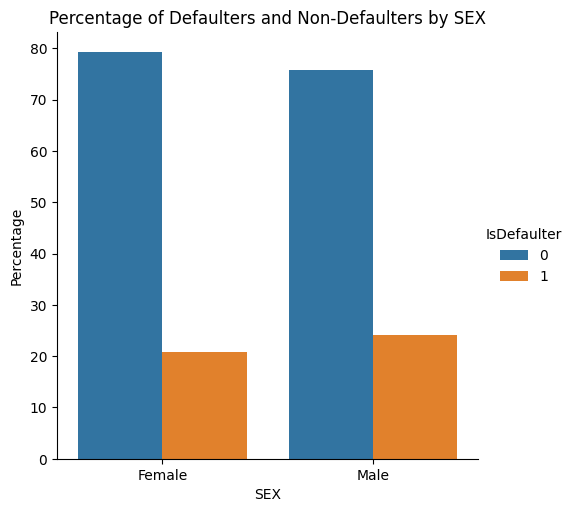

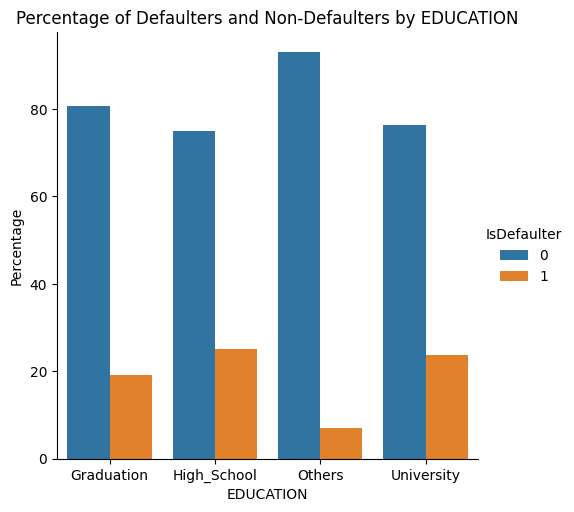

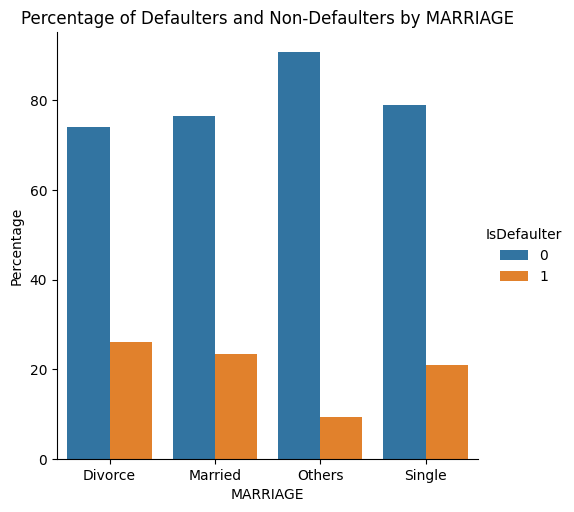

In [59]:
#  Analysis percentage of defaulter and non defaulter across all categorical features

categorical = ['SEX','EDUCATION','MARRIAGE']

# Loop through each categorical variable and create side-by-side bar plots
for cat_var in categorical:
    # Calculate the percentage of defaulters and non-defaulters for each category in the variable
    cat_default_percent = df_copy.groupby(cat_var)['IsDefaulter'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

    # Plot the side-by-side bar plot for the current categorical variable
    sns.catplot(data=cat_default_percent, x=cat_var, y='Percent', hue='IsDefaulter', kind='bar')
    plt.title(f"Percentage of Defaulters and Non-Defaulters by {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel('Percentage')
    plt.show()


##### 1. Why did you pick the specific chart?

The catplot function is used in the visualization code above because it is specifically designed for creating categorical plots. It is a high-level function that can create a variety of categorical plots with just a single line of code.

In the given code, sns.catplot is used to create bar plots for each of the three categorical variables ('SEX', 'EDUCATION', and 'MARRIAGE').

##### 2. What is/are the insight(s) found from the chart?


*   In the 'SEX' bar plot, It can be observed that even though the count of female customers are high, male customers are the ones who are defaulted more.

*   In the 'EDUCATION' bar plot, the majority proportion of defaulters are the high school and university students.



*   Similarly, in the 'MARRIAGE' bar plot, divorced and married people are more defaulters. It is also reasonable because married people and divorced people spend more rather than singles.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above visualizations can have a positive business impact. For example, if there are noticeable differences in default rates based on gender, education, or marital status, the business can tailor its credit risk assessment and marketing strategies accordingly. This can help in better targeting potential defaulters, reducing overall credit risk.

#### Chart - 5

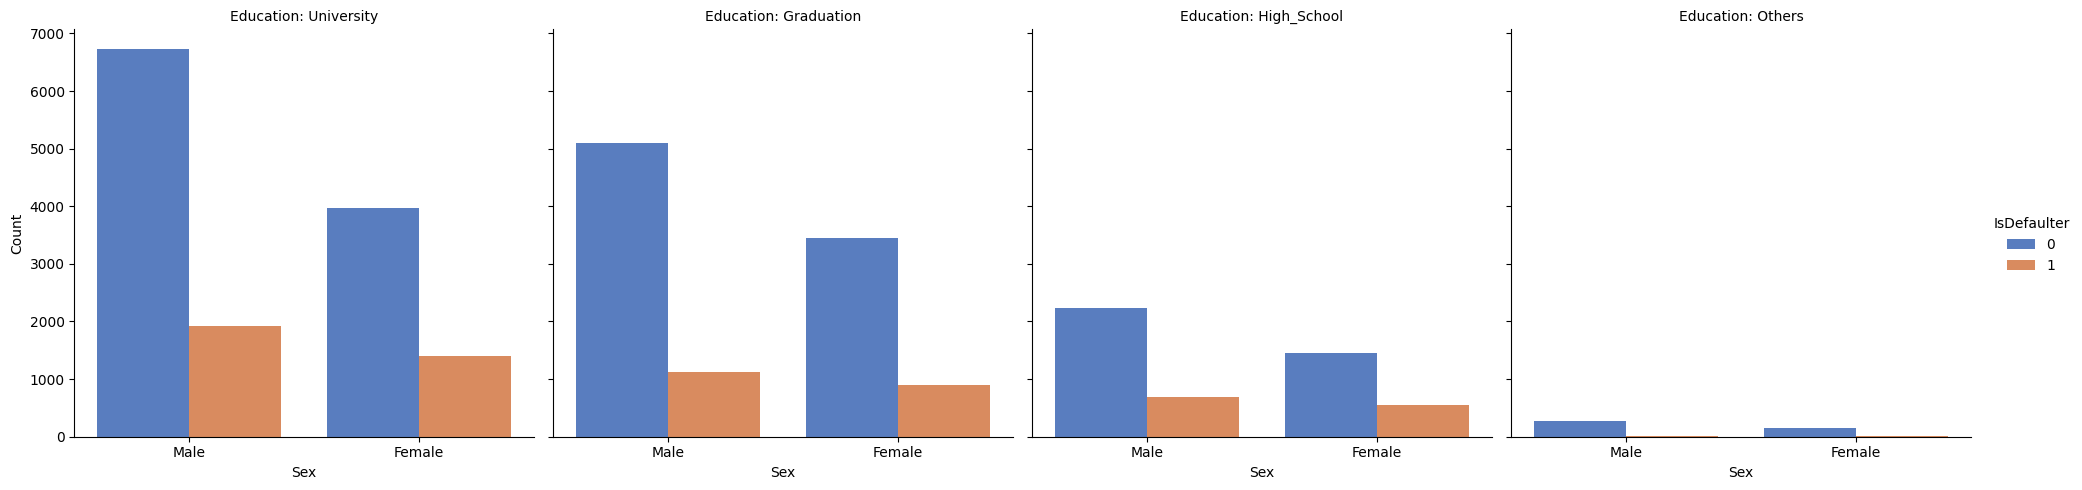

In [65]:
#Analysis defaulter for male and female across differnt education background

education = sns.catplot(data=df_copy, x='SEX', hue='IsDefaulter', col='EDUCATION', kind='count', palette='muted')

# Set the titles and labels
education.set_axis_labels('Sex', 'Count')
education.set_titles("Education: {col_name}")
education.set_xticklabels(['Male', 'Female'])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I used catplot with 'SEX' and 'EDUCATION' as categorical variables and 'IsDefault' as the hue because it allows us to visualize the distribution of defaulters and non-defaulters across different combinations of 'SEX' and 'EDUCATION' categories. The bar plots in a grid layout provide a clear and concise representation of the data, making it easier to compare the proportions of defaulters and non-defaulters for each category.

##### 2. What is/are the insight(s) found from the chart?

we can observe which combinations of 'SEX' and 'EDUCATION' have a higher or lower proportion of defaulters,and observed that all of the cases males are more prone to defaulter.

#### Chart - 6

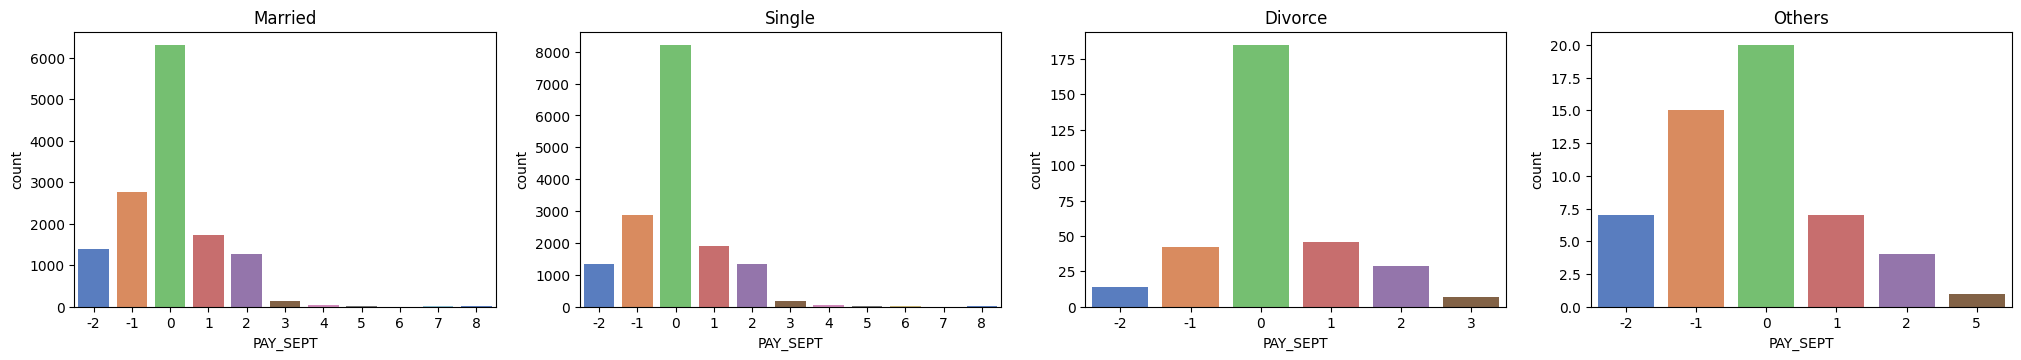

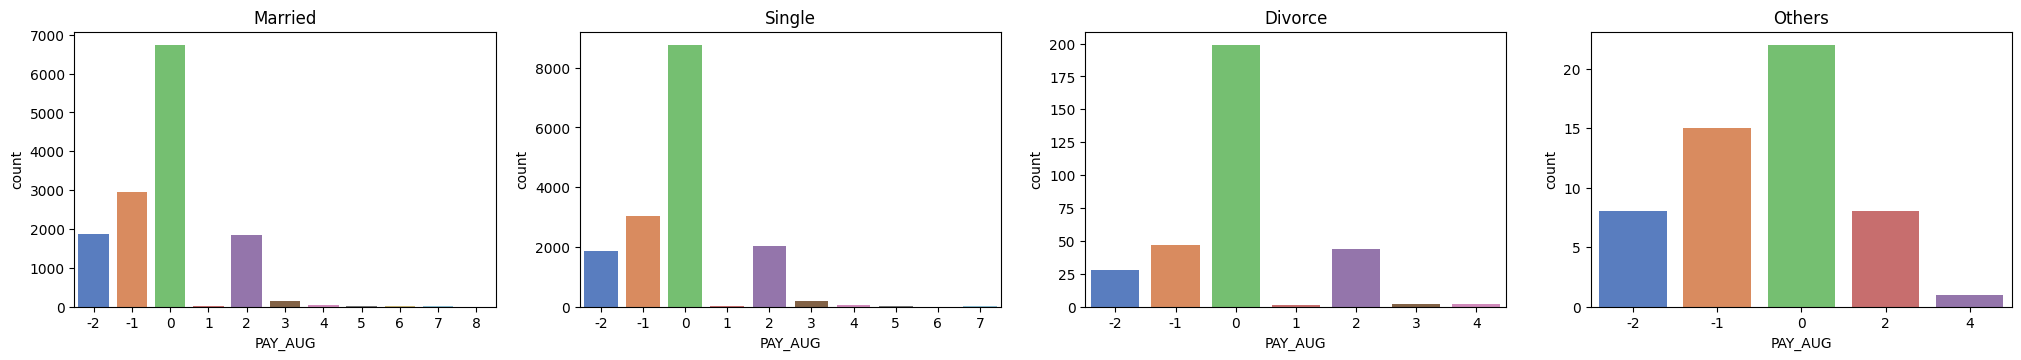

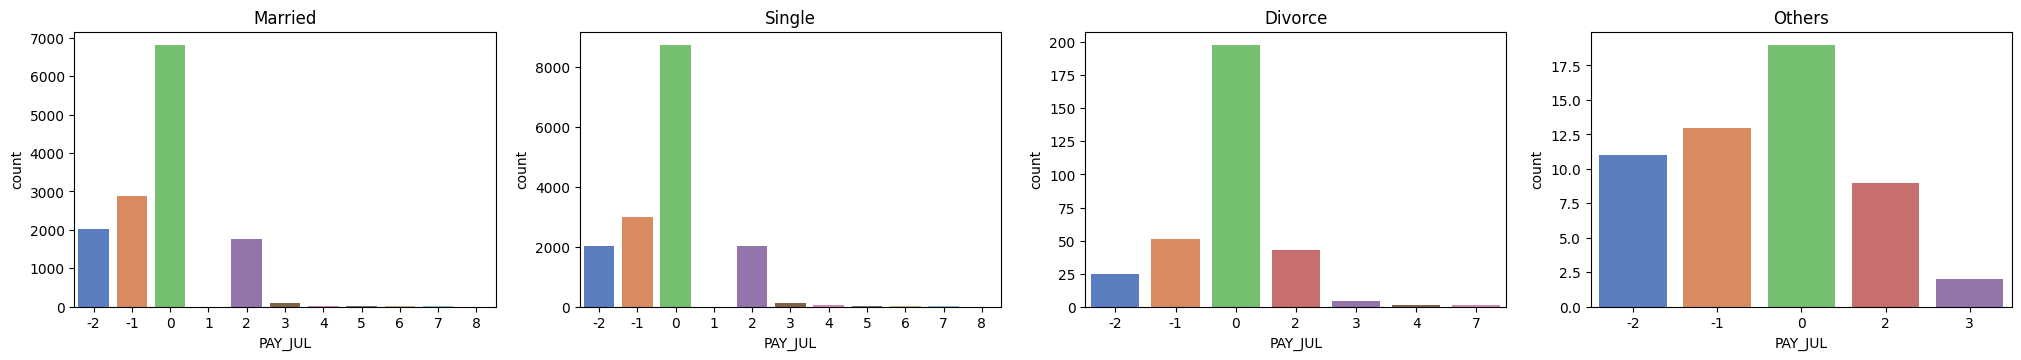

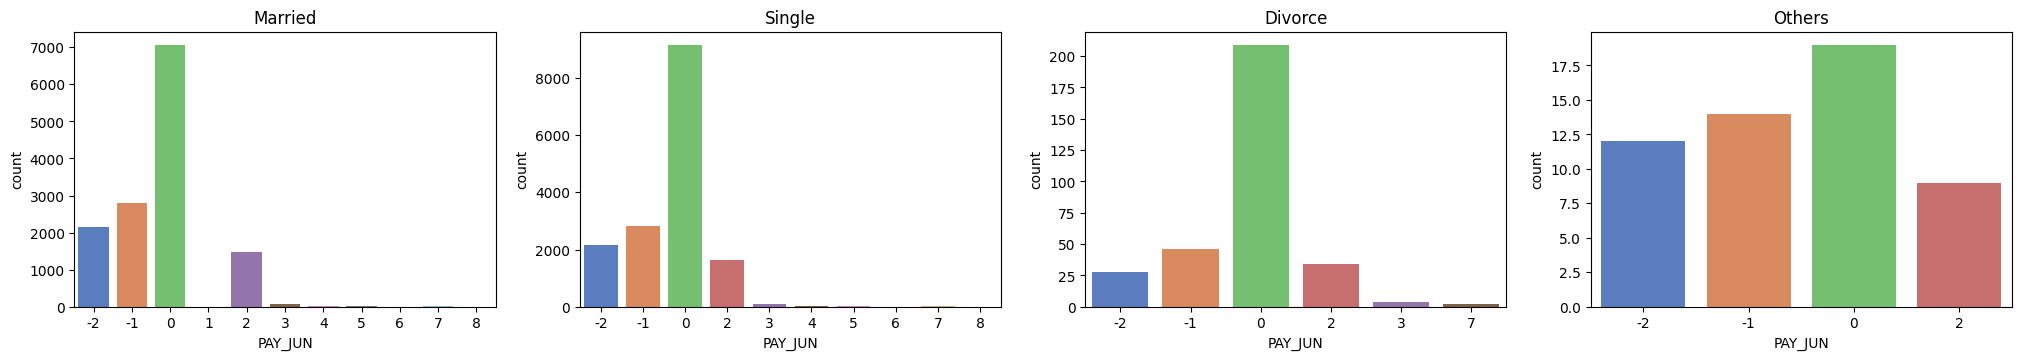

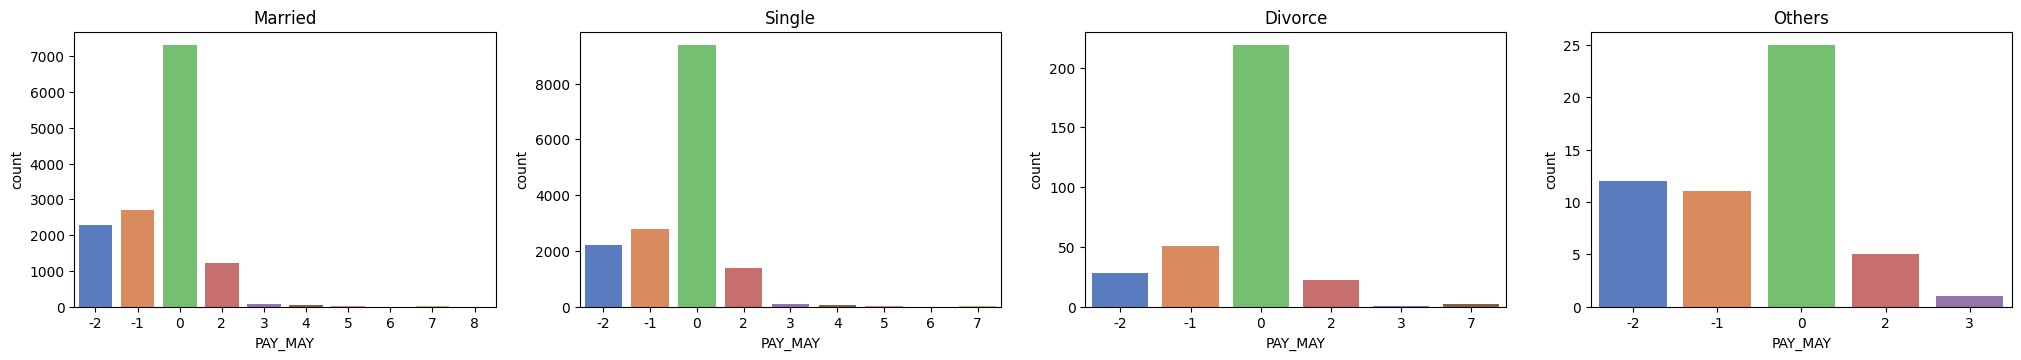

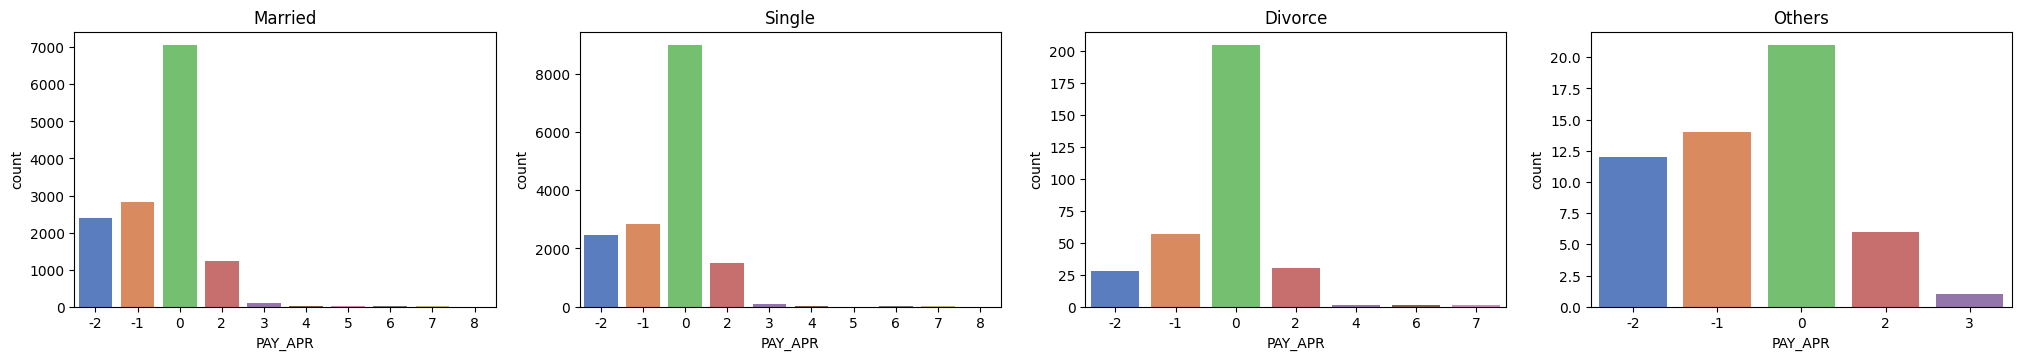

In [63]:
# Marriage vs Payment status analysis

i=1
# Define the repayment status columns in your dataset (df_copy)
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df_copy['MARRIAGE'].unique():
    df_temp = df_copy[df_copy['MARRIAGE']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status, palette='muted')
    i=i+1
  plt.show()


##### 1. Why did you pick the specific chart?

Count plotcis suitable for visualizing the distribution of categorical variables. In this case, we want to observe the distribution of payment status for different marital status categories.

##### 2. What is/are the insight(s) found from the chart?



*   It can be seen that most of the customers are utilizing revolving credit.
*   For all Marriage categories, maximum there is only 2 months of payment delay.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact: By identifying patterns of good payment behavior within specific marital status categories, businesses can offer targeted financial products and services to individuals who are more likely to repay their debts on time. This targeted approach can lead to improved customer satisfaction and loyalty.

Negative growth: On the other hand, If a particular marital status category consistently exhibits poor payment behavior and higher default rates, businesses may need to adjust their risk management strategies.

#### Chart - 7

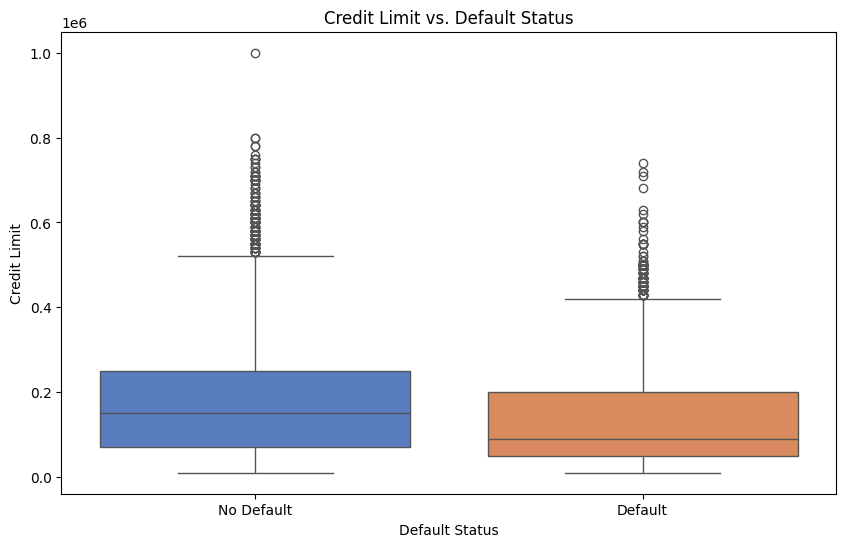

In [67]:
# Do defaulter have low credit limit?

plt.figure(figsize=(10, 6))
sns.boxplot(x='IsDefaulter', y='LIMIT_BAL', data=df_copy,palette='muted')
plt.title('Credit Limit vs. Default Status')
plt.xlabel('Default Status')
plt.ylabel('Credit Limit')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

##### 1. Why did you pick the specific chart?

We want to see the range of distribution of average bike demand according to different features.Box or whisker plot help us to analyze the data in total 5 number of summary

.Lower whisker(Q1 - 1.5*IQR)

.Q1 - Fast quartile or 25%

.Q2 - Median or 50%

.Q3 - Third quartile or 75%

.Upper whisker (Q3 + 1.5*IQR)

IQR = (Q3 - Q1)

and there is some value outside its range called Outlier.

##### 2. What is/are the insight(s) found from the chart?


It can be seen that the interquartile range (IQR) for defaulters is narrower than for non-defaulters, and avg credit limit for defaulter is lesss than non-defaulter suggesting that defaulters tend to have lower credit limits on average compared to non-defaulters.

#### Chart - 8

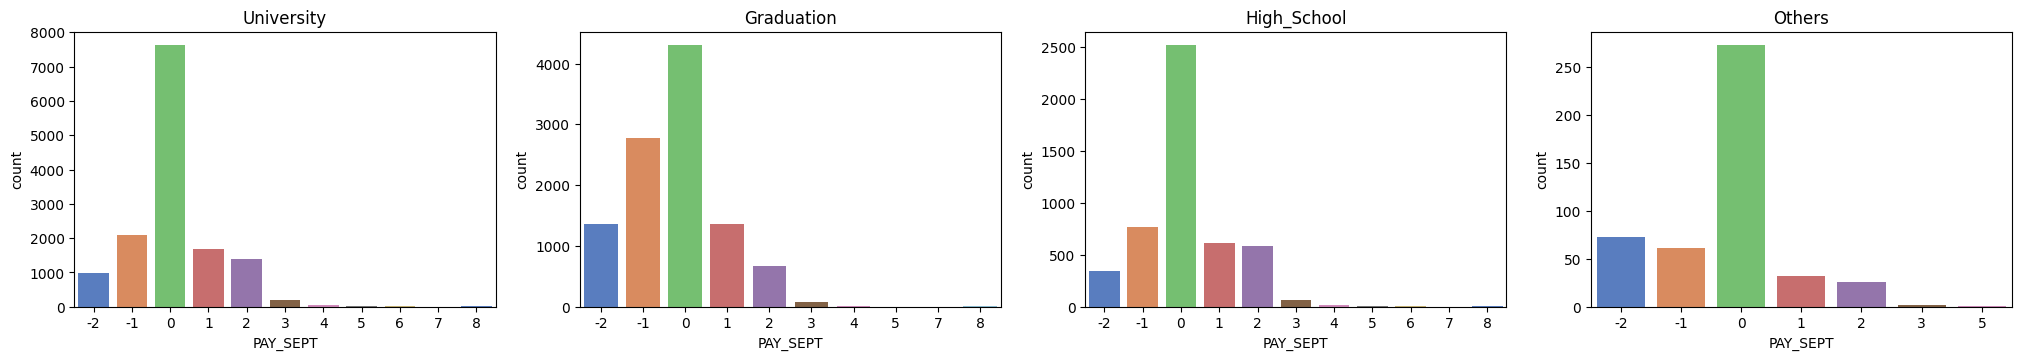

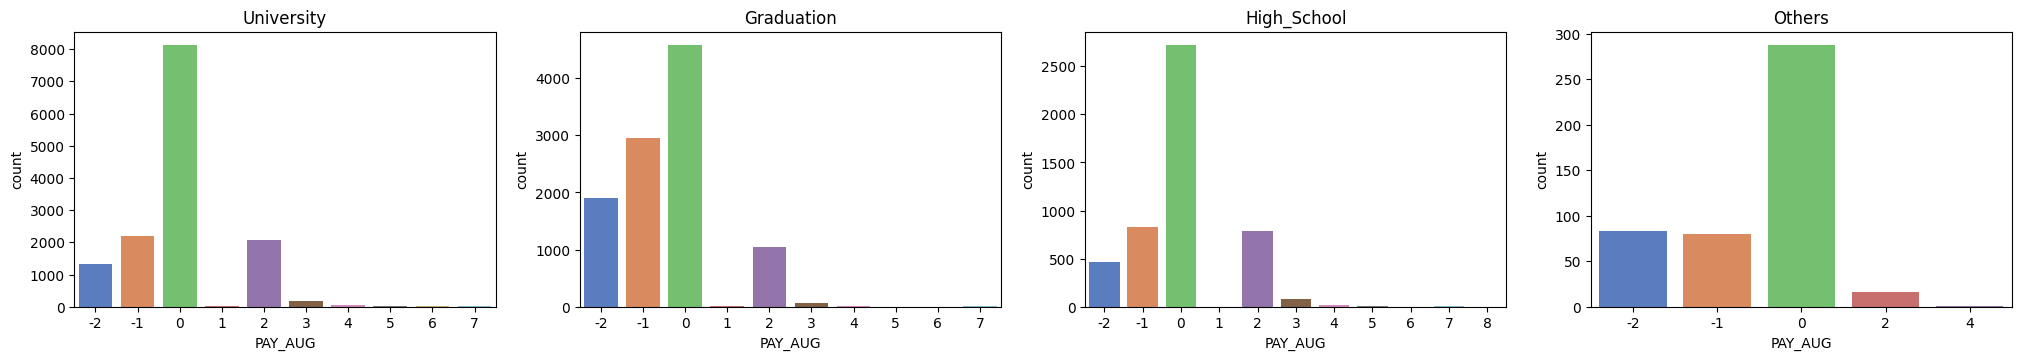

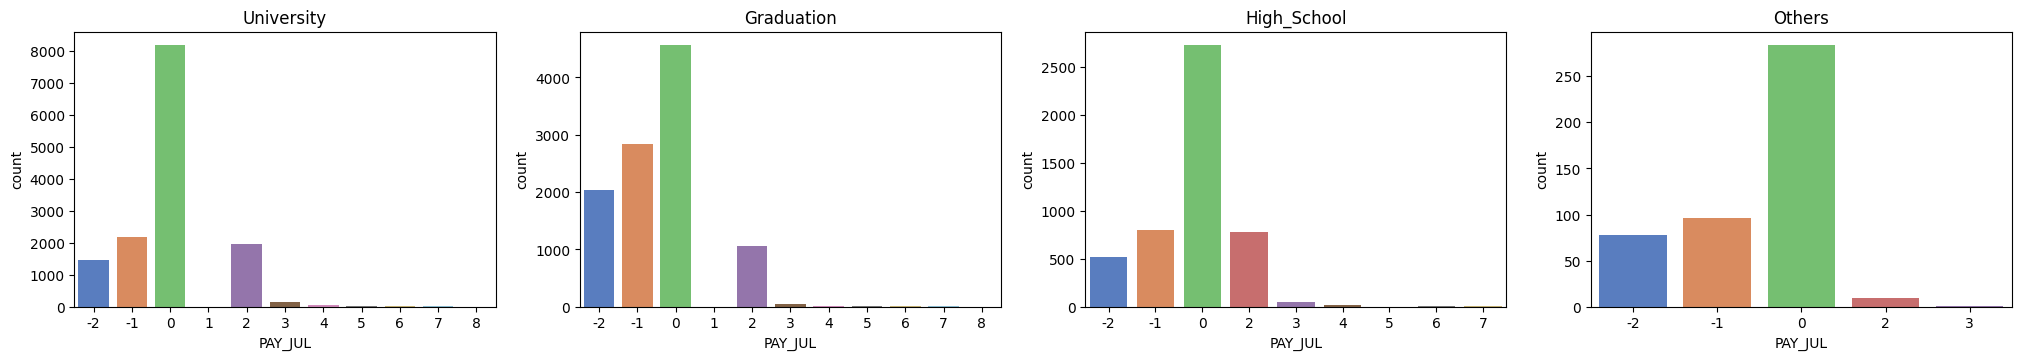

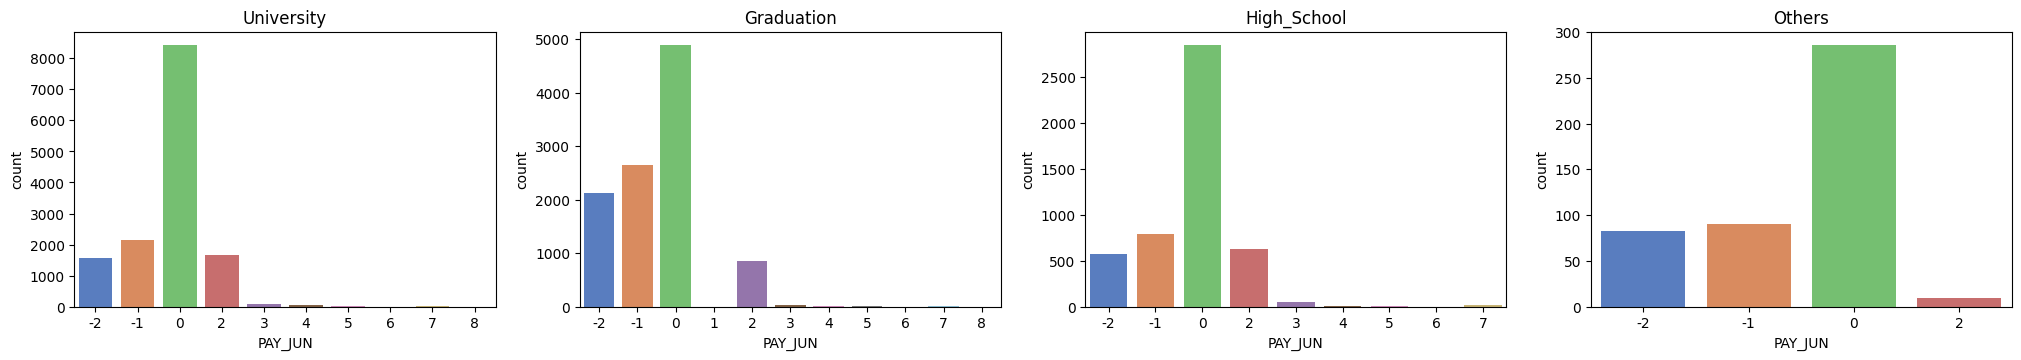

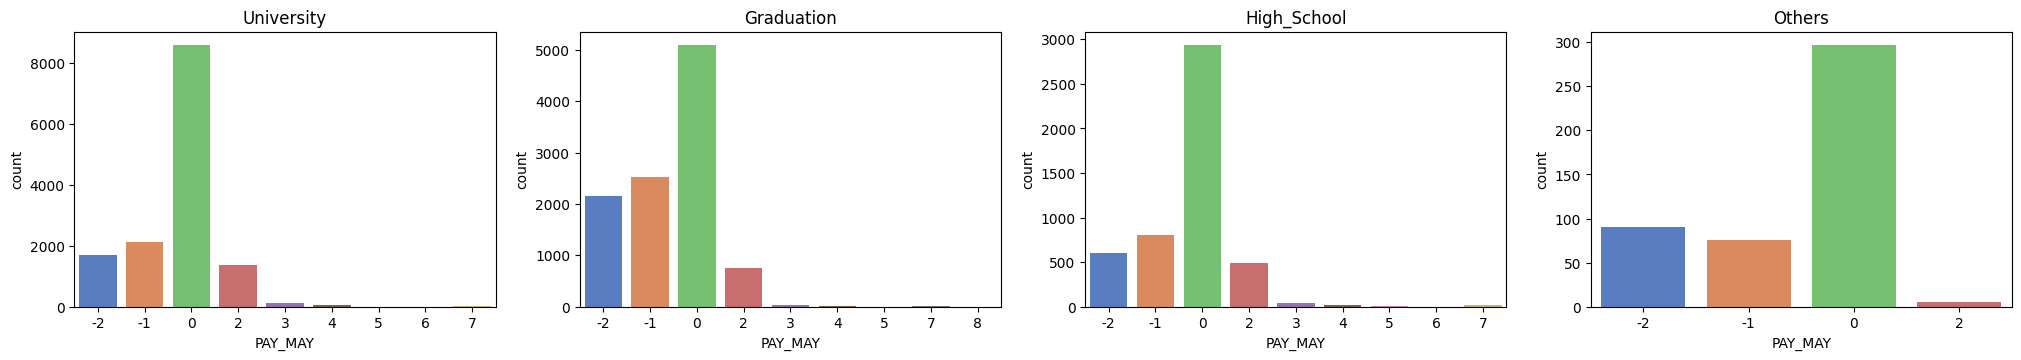

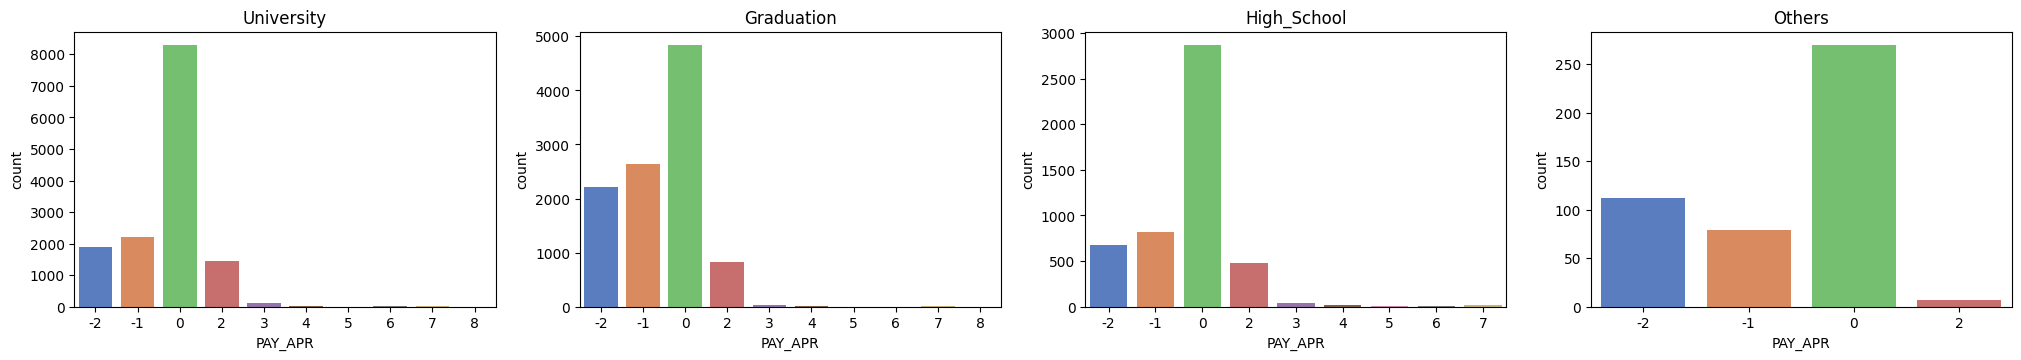

In [69]:
# Analysis do people higher education paying on time?

# Distribution of education v/s repayment status
i=1
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df_copy['EDUCATION'].unique():
    df_temp = df_copy[df_copy['EDUCATION']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='muted')
    i=i+1
  plt.show()

##### 2. What is/are the insight(s) found from the chart?

I found that customers with graduate education level are utilizing the credit less and if utilized paying in full compared to University and High school level education customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can be helpful for business to target or keep close attention on university and highschool customers where chance of repayment is delayed and further can be a defaulter.

#### Chart - 9

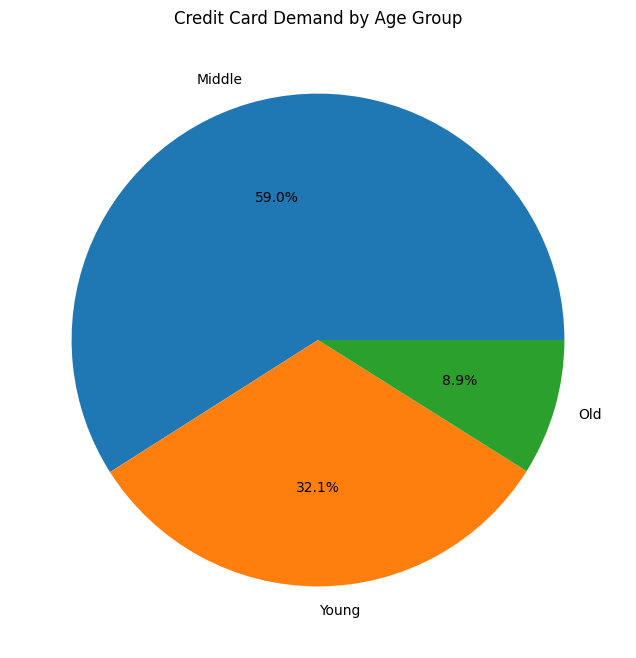

In [72]:
# find Credit card demand for each age group

# Calculate the count of individuals in each age group
age_group_counts = df_copy['AgeGroup'].value_counts()

# Pie plot of credit card demand by age group
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Credit Card Demand by Age Group')
plt.show()

##### 1. Why did you pick the specific chart?

If we have a dimension with just a couple of categories to compare, then a pie chart can help display each value of a category within the whole. The chart should read as a comparison of each group to each other, forming a whole category.

##### 2. What is/are the insight(s) found from the chart?



*   We see that middle age persons used credit card more(59%),Then young age (32.1%)
*   Uses of credit card is less for old age person(8.9%) as compare to others age group.



#### Chart - 10

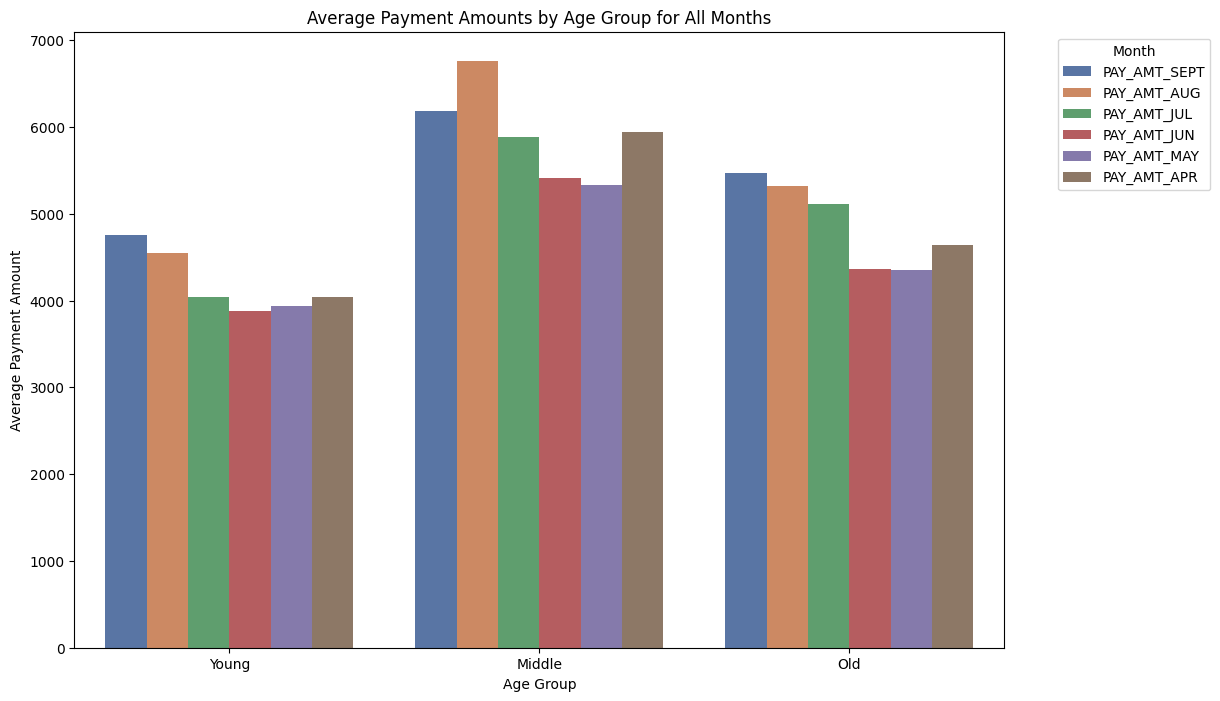

In [74]:
# Analysis of Average Payment Amounts by Age Group:
# Set a deep color palette for the bar plot
palette = sns.color_palette("deep")

# Extract payment amount columns for all months
payment_amount_columns = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Calculate the average payment amounts for each age group across all months
average_payments_by_age = df_copy.groupby('AgeGroup')[payment_amount_columns].mean().reset_index()

# Melt the DataFrame for easier plotting
average_payments_melted = pd.melt(average_payments_by_age, id_vars='AgeGroup', var_name='Month', value_name='Average Payment Amount')

# Visualization: Bar plot of average payment amounts by age group for all months
plt.figure(figsize=(12, 8))
sns.barplot(data=average_payments_melted, x='AgeGroup', y='Average Payment Amount', hue='Month', palette=palette)
plt.title('Average Payment Amounts by Age Group for All Months')
plt.xlabel('Age Group')
plt.ylabel('Average Payment Amount')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From this graph we will see that the Middle age group generally has higher average payment amounts compared to the Young and Old age groups.

In [77]:
Card_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

#### Chart - 11 - Correlation Heatmap

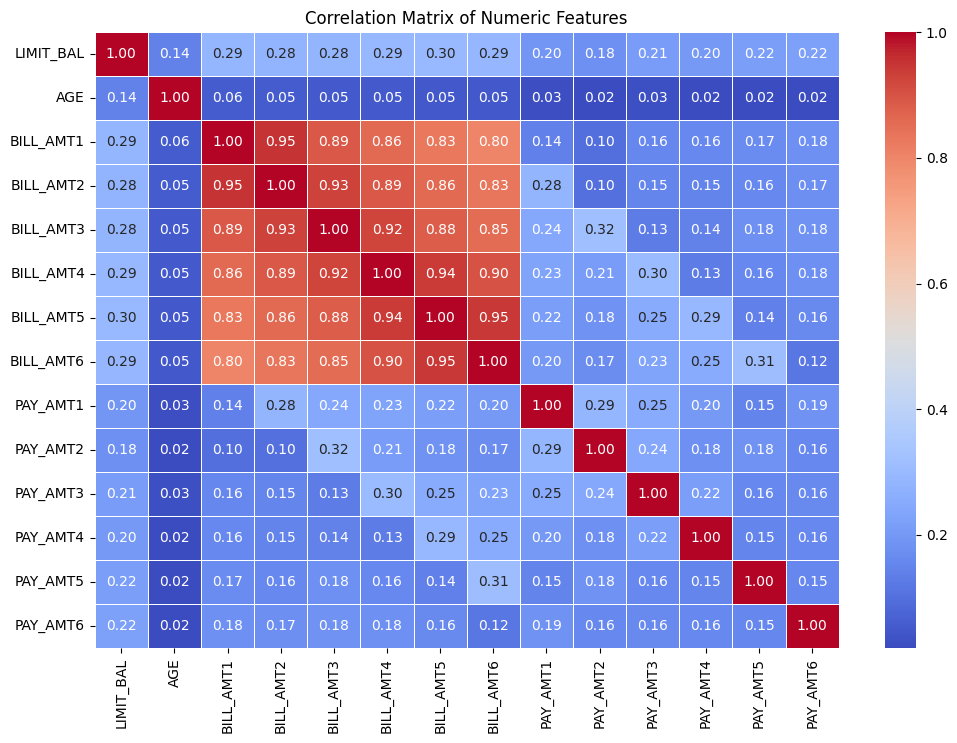

In [84]:
# Correlation Heatmap visualization code

Numerical_features = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Calculate the correlation matrix
correlation_matrix = Card_df[Numerical_features].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


##### 1. Why did you pick the specific chart?



*   The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.
*   The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.



##### 2. What is/are the insight(s) found from the chart?

From the above ovservation we see that all the bill amount feature is highly correlated with each other.either we have to remove them or making it one feature.

#### Chart - 15 - Pair Plot

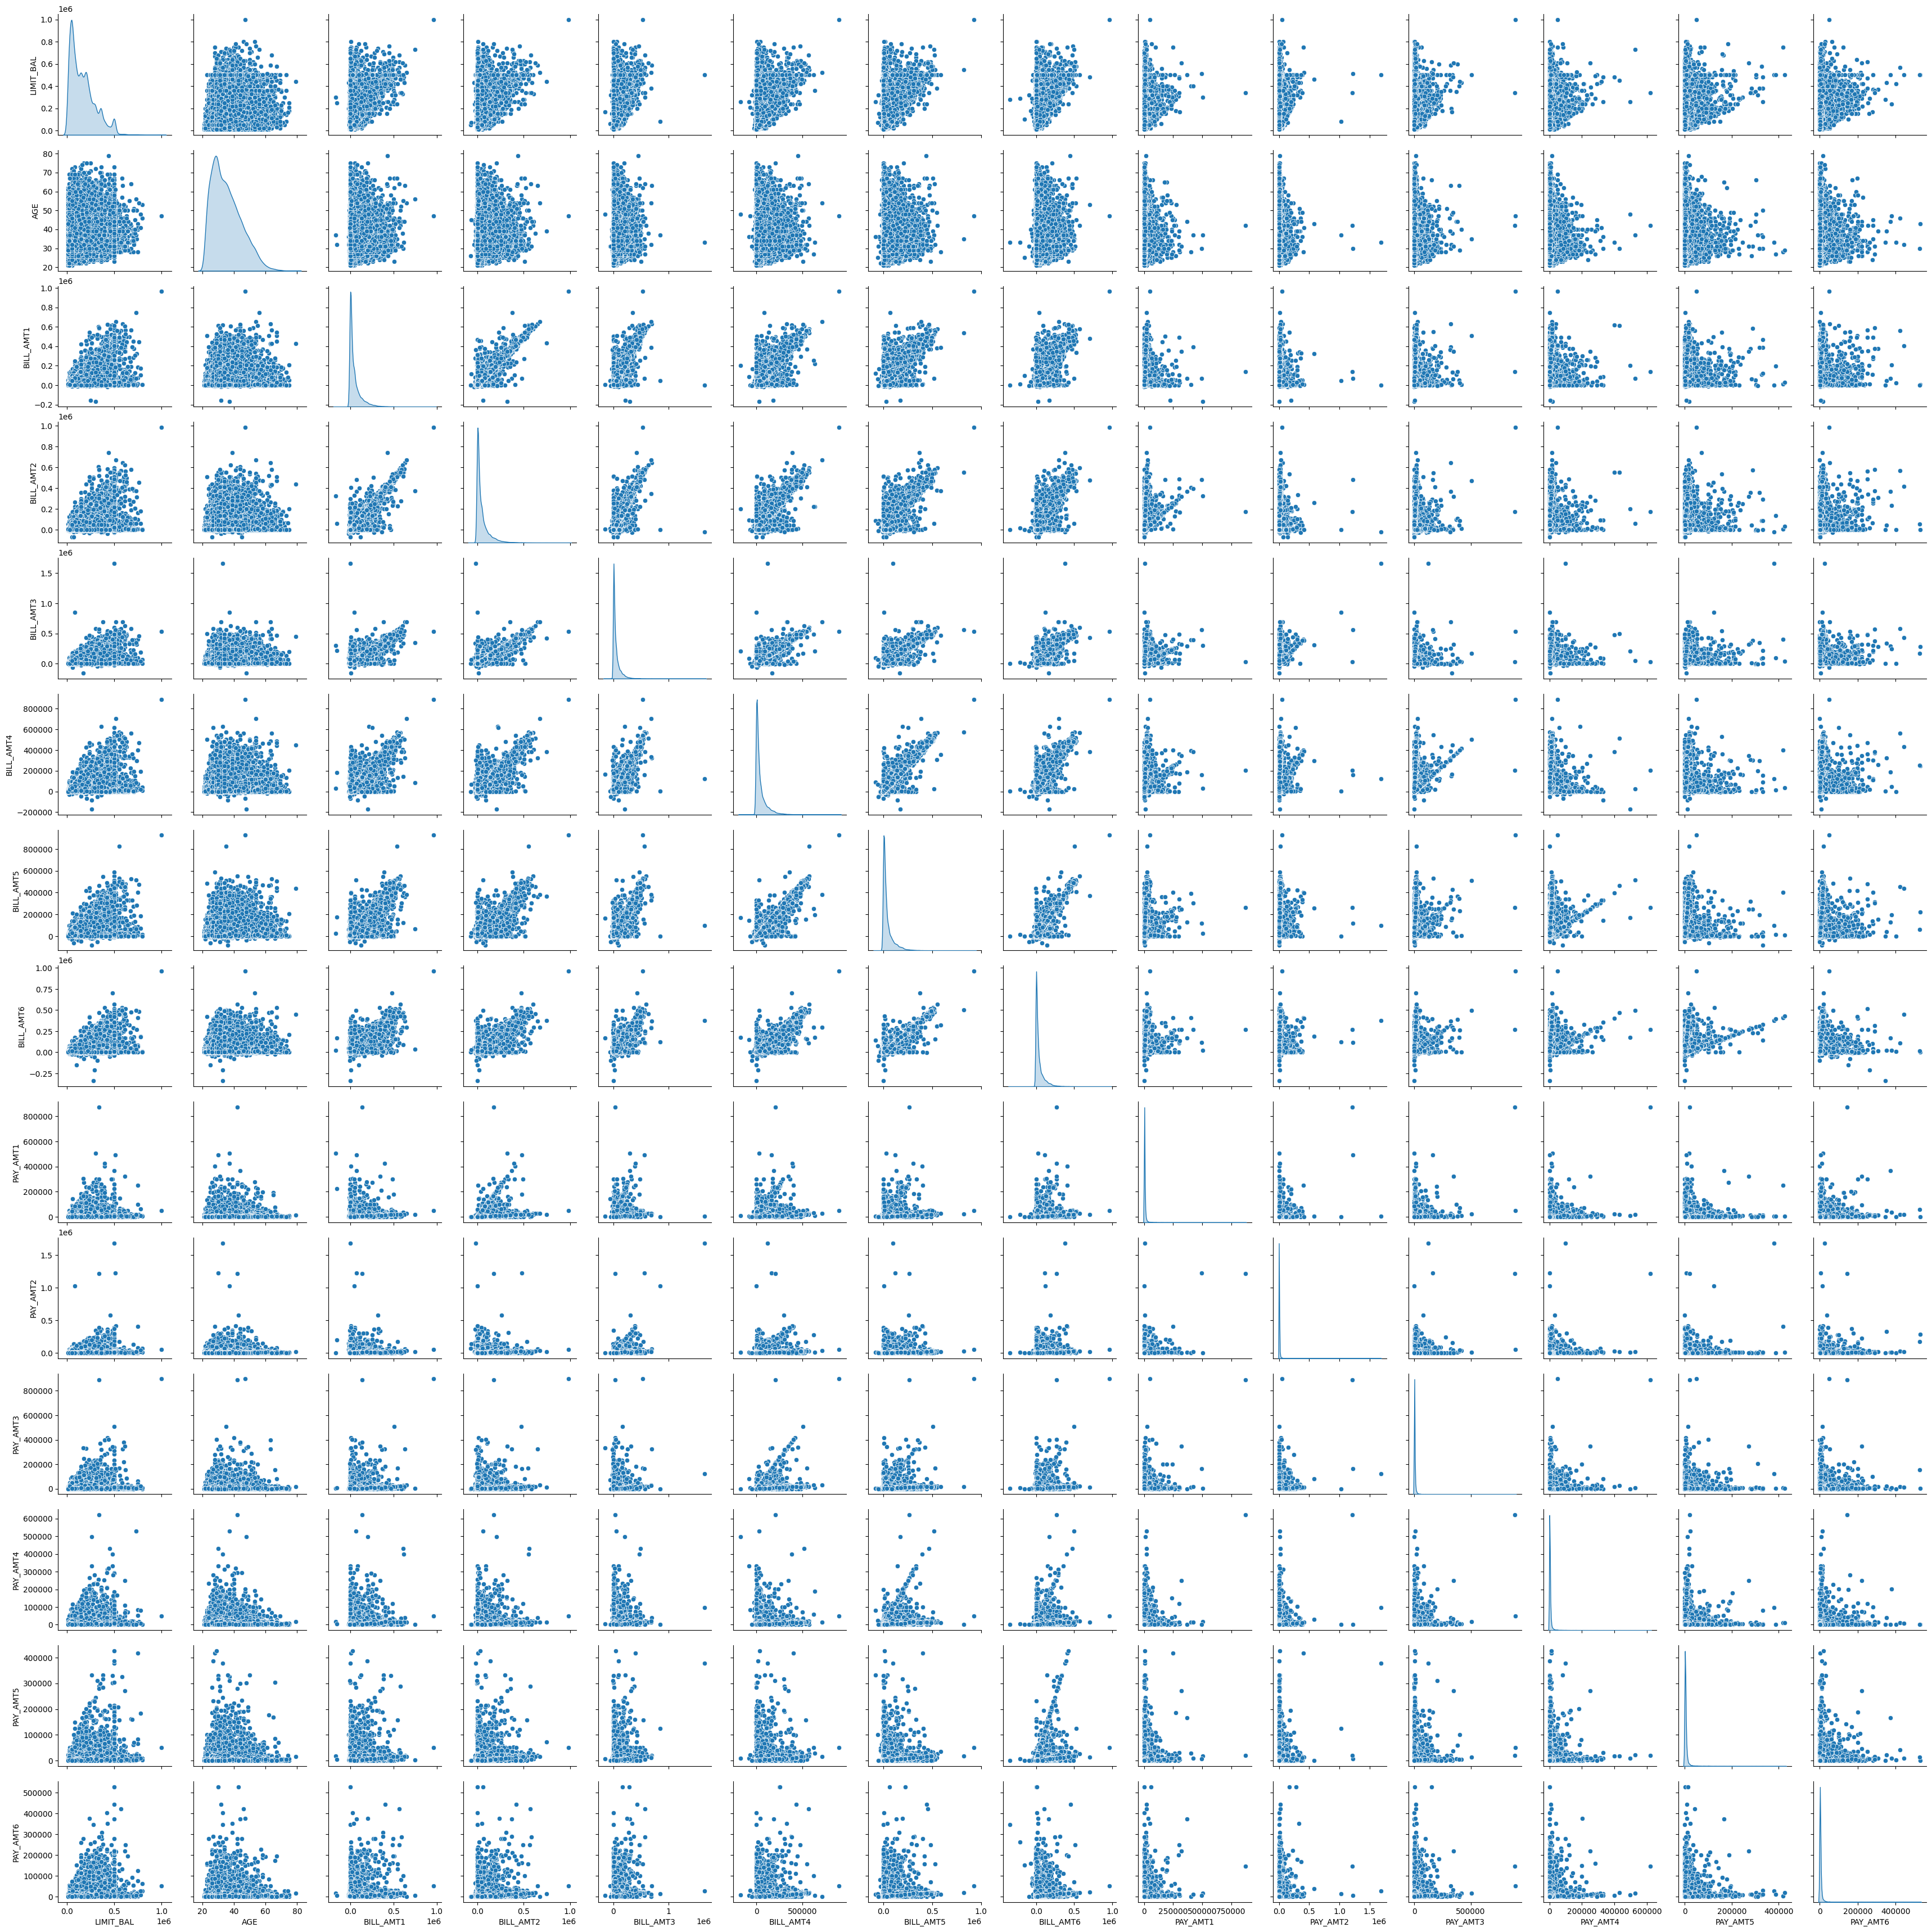

In [85]:
# Pair Plot visualization code
sns.pairplot(Card_df[Numerical_features],diag_kind = 'kde')
plt.show()

##### 1. Why did you pick the specific chart?



*   Using pairplot we will see the pair wise distribution of the data in different pair wise.
*   From the graph we can easily see the distribution of the variable .if there any right skew or left skew present or any cluster present in our data.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***